# Fractal VR


**Load and analyze paths from TMT trials**

In [1]:
import pandas as pd

# Load the CSV file to inspect its contents
file_path = 'sub_trial6_TMT_paths.csv'
data = pd.read_csv(file_path)

,1,1.1,"[[0, 0], array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -8.]), array([434., -5.]), array([434., 13.]), array([433., 43.]), array([427., 68.]), array([414., 103.]), array([398., 134.]), array([381., 160.]), array([365., 185.]), array([347., 214.]), array([335., 232.]), array([325., 248.]), array([318., 263.]), array([312., 273.]), array([300., 288.]), array([291., 298.]), array([282., 307.]), array([276., 311.]), array([276., 311.]), array([276., 311.]), array([276., 311.]), array([276., 311.]), array([276., 311.]), array([276., 311.]), array([276., 311.]), array([276., 311.]), array([276., 311.]), array([272., 314.]), array([257., 327.]), array([231., 347.]), array([203., 365.]), array([187., 375.]), array([173., 385.]), array([161., 392.]), array([150., 397.]), array([135., 400.]), array([117., 403.]), array([ 96., 405.]), array([ 70., 405.]), array([ 37., 405.]), array([ 11., 405.]), array([-17., 405.]), array([-43., 405.]), array([-73., 404.]), array([-108., 402.]), array([-140., 401.]), array([-157., 403.]), array([-163., 405.]), array([-163., 405.]), array([-163., 405.]), array([-163., 405.]), array([-163., 405.]), array([-163., 405.]), array([-169., 403.]), array([-197., 391.]), array([-225., 379.]), array([-250., 367.]), array([-262., 359.]), array([-273., 347.]), array([-285., 335.]), array([-294., 324.]), array([-309., 309.]), array([-312., 307.]), array([-312., 307.]), array([-312., 307.]), array([-312., 307.]), array([-312., 307.]), array([-312., 307.]), array([-314., 301.]), array([-336., 273.]), array([-365., 239.]), array([-395., 206.]), array([-406., 193.]), array([-407., 191.]), array([-407., 191.]), array([-407., 191.]), array([-407., 191.]), array([-407., 191.]), array([-407., 190.]), array([-410., 174.]), array([-418., 128.]), array([-423., 88.]), array([-434., 37.]), array([-438., 22.]), array([-438., 22.]), array([-438., 22.]), array([-438., 22.]), array([-438., 22.]), array([-438., 8.]), array([-439., -47.]), array([-433., -87.]), array([-428., -112.]), array([-427., -116.]), array([-427., -116.]), array([-427., -116.]), array([-427., -116.]), array([-427., -123.]), array([-416., -160.]), array([-401., -202.]), array([-396., -216.]), array([-395., -220.]), array([-395., -220.]), array([-394., -220.]), array([-391., -222.]), array([-386., -225.]), array([-383., -227.]), array([-381., -228.]), array([-379., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-378., -229.]), array([-376., -229.]), array([-374., -229.]), array([-374., -229.]), array([-373., -229.]), array([-373., -229.]), array([-373., -229.]), array([-373., -229.]), array([-373., -229.])]"
0,1,2,"[[0, 0], array([436.

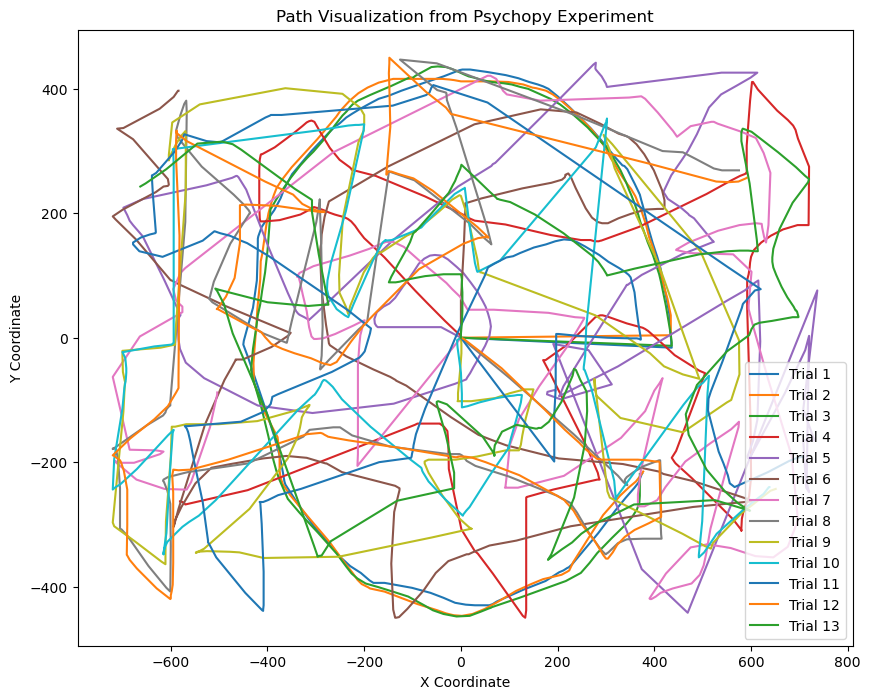

In [5]:
import re
import numpy as np

 # Extract the column containing path data
path_column = data.columns[2]


# Function to clean and convert the string representation to a list of tuples
def parse_path_string(path_string):
    if not isinstance(path_string, str):
        return None
    try:
        # Replace 'array(' and ')' to make the format compatible with eval
        cleaned_string = re.sub(r'array\((.*?)\)', r'\1', path_string)
        # Convert string to a Python list of tuples
        return ast.literal_eval(cleaned_string)
    except Exception as e:
        return None

# Apply parsing to extract coordinates
data['coordinates'] = data[path_column].apply(parse_path_string)

# Replot the cleaned paths
plt.figure(figsize=(10, 8))
for idx, row in data.iterrows():
    if row['coordinates'] is not None and len(row['coordinates']) > 1:
        coordinates = np.array(row['coordinates'])
        x, y = coordinates[:, 0], coordinates[:, 1]
        plt.plot(x, y, label=f'Trial {idx+1}')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Path Visualization from Psychopy Experiment')
plt.legend()
plt.show()

